In [ ]:
!pip install wordcloud


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [ ]:
import io

# Load the uploaded CSV file
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display top 5 rows
df.head()


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
# Strip leading/trailing spaces and convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

# Drop rows where all columns are null
df.dropna(how='all', inplace=True)

# Fill missing values
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['rating'].fillna("Not Rated", inplace=True)
df['duration'].fillna("Unknown", inplace=True)



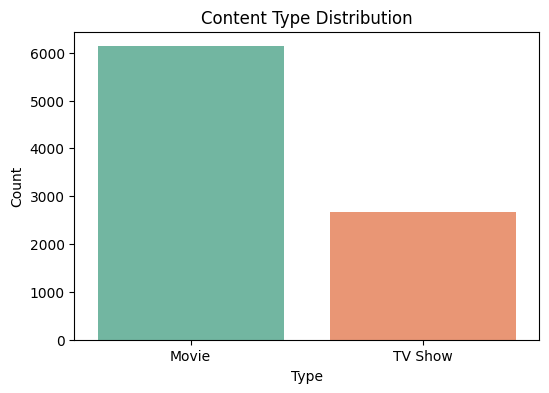

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Content Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


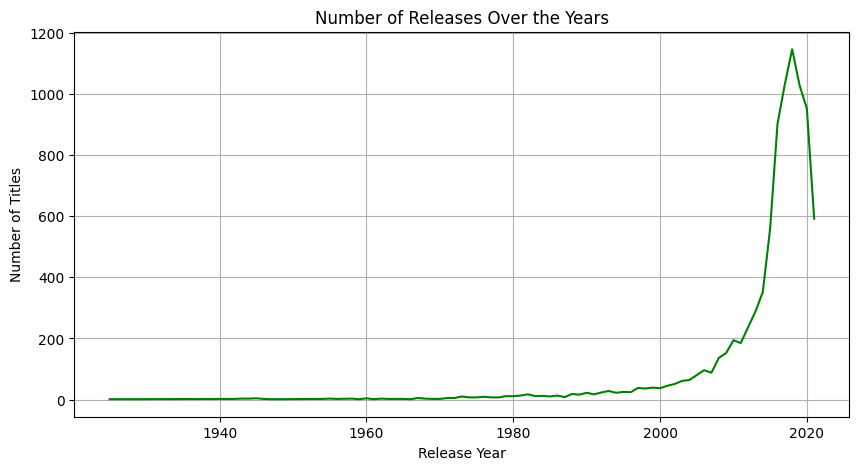

In [ ]:
plt.figure(figsize=(10, 5))
df['release_year'].value_counts().sort_index().plot(kind='line', color='green')
plt.title("Number of Releases Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


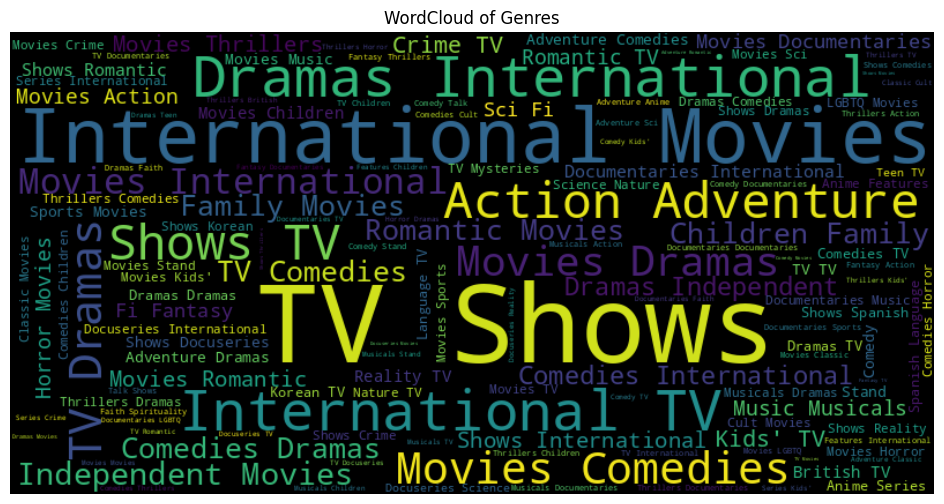

In [ ]:
plt.figure(figsize=(12, 6))
text = ' '.join(df['listed_in'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Genres")
plt.show()


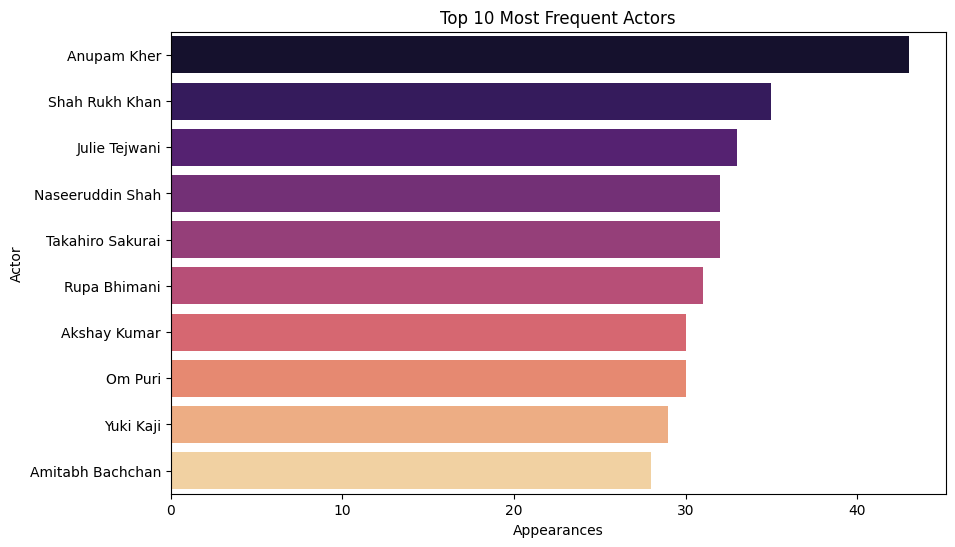

In [ ]:
from collections import Counter

# Flatten the cast column into individual actor names
actor_list = df['cast'].dropna().astype(str).str.split(', ')
actor_flat = [actor for sublist in actor_list for actor in sublist if actor != "Unknown"]

# Count top 10 actors
top_actors = Counter(actor_flat).most_common(10)
actors_df = pd.DataFrame(top_actors, columns=['Actor', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=actors_df, x='Count', y='Actor', palette='magma')
plt.title("Top 10 Most Frequent Actors")
plt.xlabel("Appearances")
plt.ylabel("Actor")
plt.show()


In [ ]:
print("✅ Dataset contains", df.shape[0], "rows and", df.shape[1], "columns.")


✅ Dataset contains 8807 rows and 12 columns.
